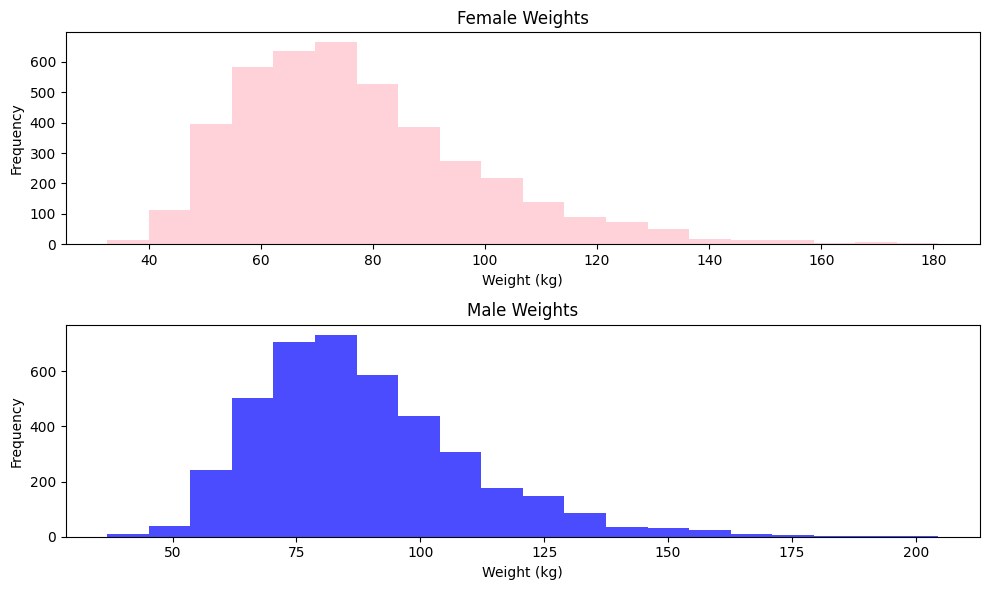

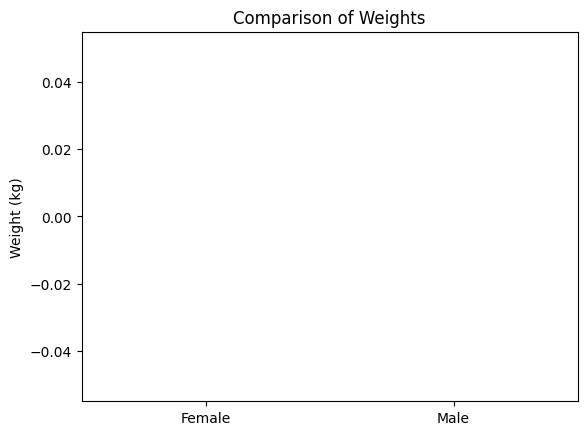

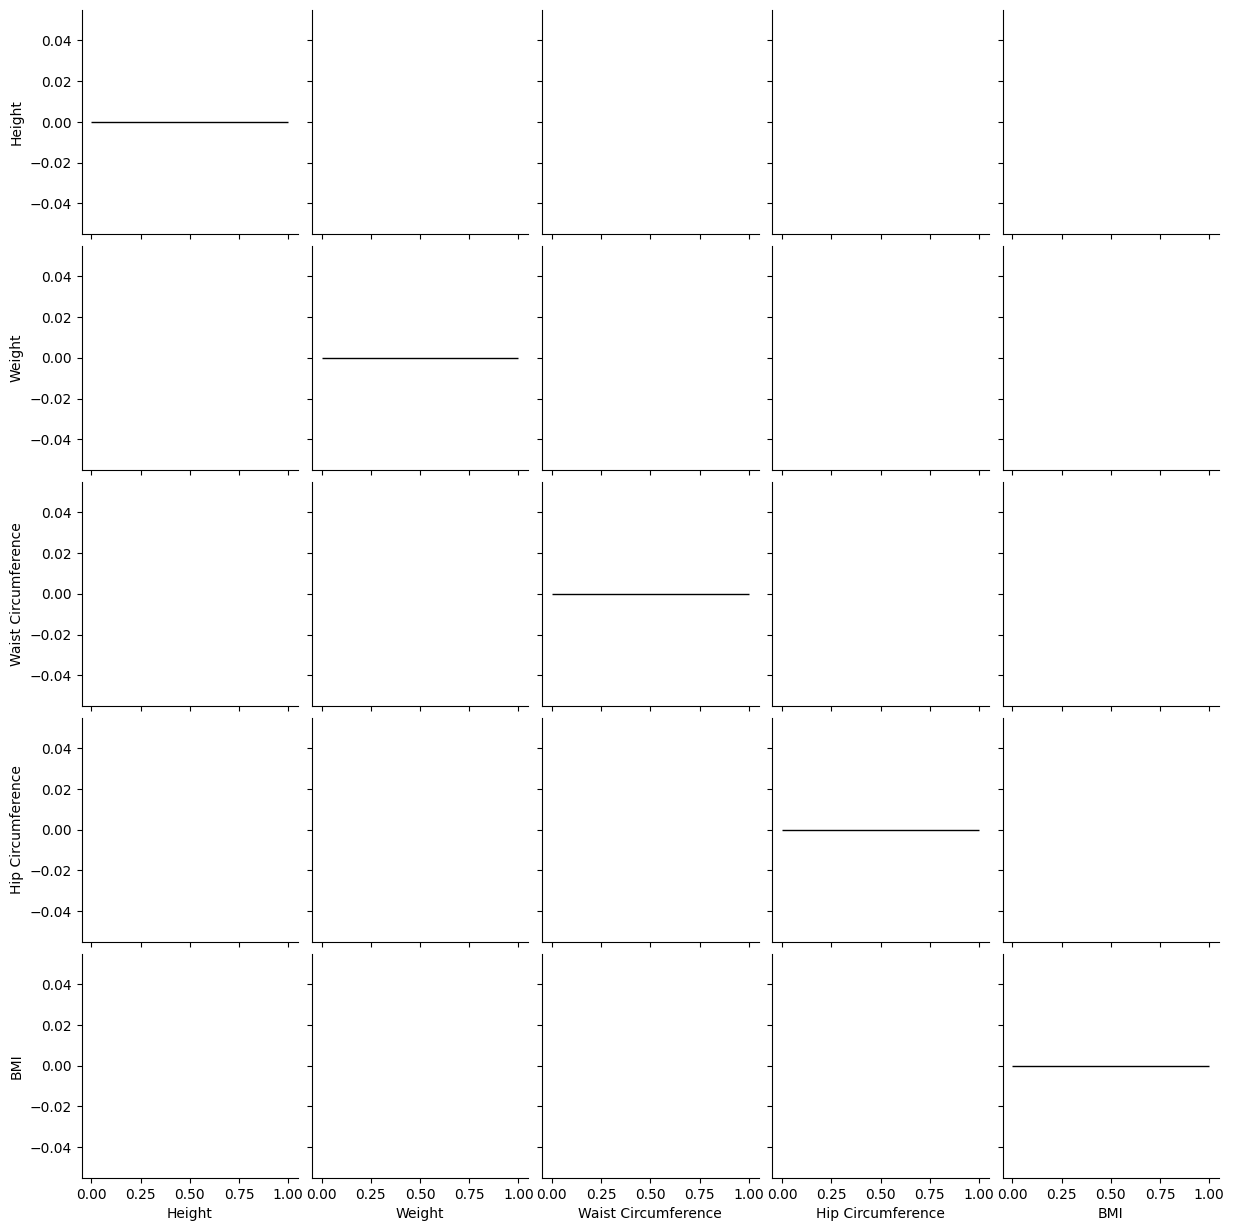

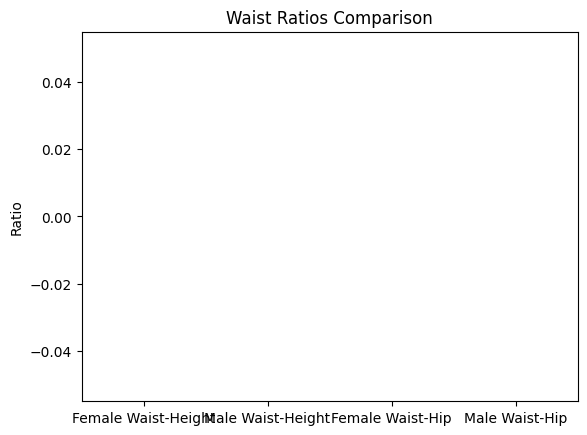

Standardized measurements of 5 lowest BMI individuals:
 [[nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]]

Standardized measurements of 5 highest BMI individuals:
 [[nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]]


In [2]:
# Import necessary libraries
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

# Load the datasets
male_data = np.genfromtxt('C:\\Users\\chand\\Downloads\\nhanes_adult_male_bmx_2020.csv', delimiter=',', skip_header=1)
female_data = np.genfromtxt('C:\\Users\\chand\\Downloads\\nhanes_adult_female_bmx_2020.csv', delimiter=',', skip_header=1)

# Step 3: Plot histograms for male and female weights
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.hist(female_data[:, 0], bins=20, color='pink', alpha=0.7)
plt.title('Female Weights')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')

plt.subplot(2, 1, 2)
plt.hist(male_data[:, 0], bins=20, color='blue', alpha=0.7)
plt.title('Male Weights')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Step 4: Box-and-whisker plot for male and female weights
plt.boxplot([female_data[:, 0], male_data[:, 0]], tick_labels=['Female', 'Male'])  # Fixed to tick_labels
plt.title('Comparison of Weights')
plt.ylabel('Weight (kg)')
plt.show()

# Step 5: Compute basic numerical aggregates
female_weight_mean = np.mean(female_data[:, 0])
female_weight_std = np.std(female_data[:, 0])
male_weight_mean = np.mean(male_data[:, 0])
male_weight_std = np.std(male_data[:, 0])

# Step 6: Add BMI column for females
female_bmi = female_data[:, 0] / ((female_data[:, 1] / 100) ** 2)  # BMI = weight / height^2
female_data = np.column_stack((female_data, female_bmi))  # Add BMI column to the dataset

# Step 7: Standardize female dataset (z-scores)
zfemale = (female_data - np.mean(female_data, axis=0)) / np.std(female_data, axis=0)

# Step 8: Scatterplot matrix (pairplot) for female metrics
female_df = pd.DataFrame(zfemale, columns=['Weight', 'Height', 'Upper Arm', 'Upper Leg', 
                                           'Arm Circumference', 'Hip Circumference', 
                                           'Waist Circumference', 'BMI'])
sns.pairplot(female_df[['Height', 'Weight', 'Waist Circumference', 'Hip Circumference', 'BMI']])
plt.show()

# Correlations
correlations = {}
for col1 in female_df.columns:
    for col2 in female_df.columns:
        if col1 != col2:
            pearson_corr, _ = pearsonr(female_df[col1], female_df[col2])
            spearman_corr, _ = spearmanr(female_df[col1], female_df[col2])
            correlations[(col1, col2)] = (pearson_corr, spearman_corr)

# Step 9: Compute ratios for waist-to-height and waist-to-hip
female_waist_height_ratio = female_data[:, 6] / female_data[:, 1]  # Waist-to-Height ratio
female_waist_hip_ratio = female_data[:, 6] / female_data[:, 5]  # Waist-to-Hip ratio
male_waist_height_ratio = male_data[:, 6] / male_data[:, 1]  # Waist-to-Height ratio for males
male_waist_hip_ratio = male_data[:, 6] / male_data[:, 5]  # Waist-to-Hip ratio for males

# Adding ratios to the matrices
female_data = np.column_stack((female_data, female_waist_height_ratio, female_waist_hip_ratio))
male_data = np.column_stack((male_data, male_waist_height_ratio, male_waist_hip_ratio))

# Step 10: Boxplot for the ratios
plt.boxplot([female_waist_height_ratio, male_waist_height_ratio, female_waist_hip_ratio, male_waist_hip_ratio], 
            tick_labels=['Female Waist-Height', 'Male Waist-Height', 'Female Waist-Hip', 'Male Waist-Hip'])
plt.title('Waist Ratios Comparison')
plt.ylabel('Ratio')
plt.show()

# Step 12: Display standardized measurements for lowest and highest BMI individuals
sorted_bmi_indices = np.argsort(female_bmi)
lowest_bmi = zfemale[sorted_bmi_indices[:5]]  # Get the 5 individuals with lowest BMI
highest_bmi = zfemale[sorted_bmi_indices[-5:]]  # Get the 5 individuals with highest BMI

print("Standardized measurements of 5 lowest BMI individuals:\n", lowest_bmi)
print("\nStandardized measurements of 5 highest BMI individuals:\n", highest_bmi)